In [38]:
#!pip install pyshp

In [39]:
import warnings
warnings.filterwarnings("ignore")

In [40]:
import pandas as pd
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import geopy
%matplotlib inline

## Plotting population density map

In [41]:
amsterdam_shapes = pd.read_excel("amsterdam_shapes_updated.xlsx", sheet_name = "amsterdam_shapes")
amsterdam_shapes.drop('WKT_LAT_LNG', axis = 1, inplace = True)
amsterdam_shapes.head()

,OBJECTNUMMER,Postcode4,Opp_m2,WKT_LNG_LAT,LNG,LAT
0,1,1082,1469377,"POLYGON((4.868687 52.338103,4.872005 52.338273...",4.875190,52.330143
1,2,1102,3139699,"POLYGON((4.956755 52.324039,4.963566 52.31659,...",4.954522,52.315311
2,3,1101,5292105,"POLYGON((4.94021 52.319328,4.940354 52.319157,...",4.950587,52.298748
3,4,1107,2029641,"POLYGON((4.961748 52.295374,4.962318 52.295574...",4.982498,52.290373
4,5,1103,2041467,"POLYGON((4.991675 52.324431,4.982315 52.321234...",4.974215,52.323872


In [42]:
amsterdam_shapes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OBJECTNUMMER  80 non-null     int64  
 1   Postcode4     80 non-null     int64  
 2   Opp_m2        80 non-null     int64  
 3   WKT_LNG_LAT   80 non-null     object 
 4   LNG           80 non-null     float64
 5   LAT           80 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 3.9+ KB


## wkt.loads
## crs = 'epsg: 4326'

In [43]:
from shapely import wkt

amsterdam_shapes['WKT_LNG_LAT'] = amsterdam_shapes['WKT_LNG_LAT'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(amsterdam_shapes, crs='epsg:4326')
gdf.head()

,OBJECTNUMMER,Postcode4,Opp_m2,WKT_LNG_LAT,LNG,LAT
0,1,1082,1469377,"POLYGON ((4.868687 52.338103, 4.872005 52.3382...",4.875190,52.330143
1,2,1102,3139699,"POLYGON ((4.956755 52.324039, 4.963566 52.3165...",4.954522,52.315311
2,3,1101,5292105,"POLYGON ((4.94021 52.319328, 4.940354 52.31915...",4.950587,52.298748
3,4,1107,2029641,"POLYGON ((4.961748 52.295374, 4.962318 52.2955...",4.982498,52.290373
4,5,1103,2041467,"POLYGON ((4.991675 52.324431, 4.982315 52.3212...",4.974215,52.323872


In [44]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OBJECTNUMMER  80 non-null     int64  
 1   Postcode4     80 non-null     int64  
 2   Opp_m2        80 non-null     int64  
 3   WKT_LNG_LAT   80 non-null     object 
 4   LNG           80 non-null     float64
 5   LAT           80 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 3.9+ KB


<AxesSubplot:>

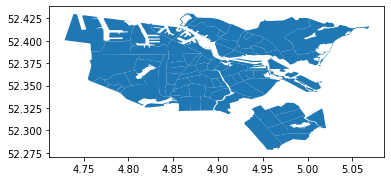

In [45]:
gdf.rename({'OBJECTNUMMER':'Id','Postcode4':'postcode','WKT_LNG_LAT':'geometry'}, axis = 1, inplace = True)
gdf.plot()

In [46]:
pop_den = pd.read_csv("Amsterdam_high_pop.csv")
pop_den.head()

,Districts and neighborhoods,Population density float_x,Districts and neighborhoods copy,Municipality,Population,Population density,Number of income recipients,Average income per income recipient,Average income per inhabitant,40% persons with the lowest income,...,Active 15-75 years,40% households with the lowest income,20% households with the highest income,low income housholds,below or around the social minimum,Most common zip code,Coverage percentage,Longitude,Latitude,Population density float_y
0,Frederik Hendrikbuurt Southeast,29133.0,Frederik Hendrikbuurt Southeast,Amsterdam,3 295,29 133,2700,39.0,34.1,34.1,...,72.2,53.5,15.1,16.9,14.8,1052,1,4.873743,52.376234,29133.0
1,Houthavens East,28636.0,Houthavens East,Amsterdam,660,28 636,600,.,.,29.4,...,67.4,37.2,25.9,11.3,9.7,1013,1,4.874623,52.401384,28636.0
2,Staatsliedenbuurt,28139.0,Staatsliedenbuurt,Amsterdam,13 315,28 139,11 200,36.3,31.0,35.9,...,69.6,51.4,15.1,14.6,13.9,.,.,4.870951,52.380286,28139.0
3,Van Lennepbuurt,28005.0,Van Lennepbuurt,Amsterdam,6 990,28 005,6000,34.1,29.6,40.6,...,63.4,58.4,11.3,16.5,16.5,.,.,4.868476,52.365297,28005.0
4,Spaarndammerbuurt Northeast,27863.0,Spaarndammerbuurt Northeast,Amsterdam,2 775,27 863,2 300,.,24.8,46.4,...,57.7,63.0,9.9,22.0,20.9,1013,1,4.879369,52.389663,27863.0


In [47]:
pop_den.rename({'Most common zip code':'postcode'}, axis =1,  inplace = True)
pop_den.head()

,Districts and neighborhoods,Population density float_x,Districts and neighborhoods copy,Municipality,Population,Population density,Number of income recipients,Average income per income recipient,Average income per inhabitant,40% persons with the lowest income,...,Active 15-75 years,40% households with the lowest income,20% households with the highest income,low income housholds,below or around the social minimum,postcode,Coverage percentage,Longitude,Latitude,Population density float_y
0,Frederik Hendrikbuurt Southeast,29133.0,Frederik Hendrikbuurt Southeast,Amsterdam,3 295,29 133,2700,39.0,34.1,34.1,...,72.2,53.5,15.1,16.9,14.8,1052,1,4.873743,52.376234,29133.0
1,Houthavens East,28636.0,Houthavens East,Amsterdam,660,28 636,600,.,.,29.4,...,67.4,37.2,25.9,11.3,9.7,1013,1,4.874623,52.401384,28636.0
2,Staatsliedenbuurt,28139.0,Staatsliedenbuurt,Amsterdam,13 315,28 139,11 200,36.3,31.0,35.9,...,69.6,51.4,15.1,14.6,13.9,.,.,4.870951,52.380286,28139.0
3,Van Lennepbuurt,28005.0,Van Lennepbuurt,Amsterdam,6 990,28 005,6000,34.1,29.6,40.6,...,63.4,58.4,11.3,16.5,16.5,.,.,4.868476,52.365297,28005.0
4,Spaarndammerbuurt Northeast,27863.0,Spaarndammerbuurt Northeast,Amsterdam,2 775,27 863,2 300,.,24.8,46.4,...,57.7,63.0,9.9,22.0,20.9,1013,1,4.879369,52.389663,27863.0


In [48]:
gdf

,Id,postcode,Opp_m2,geometry,LNG,LAT
0,1,1082,1469377,"POLYGON ((4.86869 52.33810, 4.87200 52.33827, ...",4.875190,52.330143
1,2,1102,3139699,"POLYGON ((4.95676 52.32404, 4.96357 52.31659, ...",4.954522,52.315311
2,3,1101,5292105,"POLYGON ((4.94021 52.31933, 4.94035 52.31916, ...",4.950587,52.298748
3,4,1107,2029641,"POLYGON ((4.96175 52.29537, 4.96232 52.29557, ...",4.982498,52.290373
4,5,1103,2041467,"POLYGON ((4.99167 52.32443, 4.98231 52.32123, ...",4.974215,52.323872
...,...,...,...,...,...,...
75,76,1044,2021347,"POLYGON ((4.80390 52.41780, 4.80397 52.41782, ...",4.810397,52.406294
76,77,1057,999544,"POLYGON ((4.84257 52.36958, 4.84522 52.36961, ...",4.853591,52.367434
77,78,1022,1286869,"MULTIPOLYGON (((4.94398 52.38435, 4.94331 52.3...",4.931383,52.396421
78,79,1052,530690,"POLYGON ((4.86636 52.37158, 4.86724 52.37253, ...",4.874475,52.378639


In [49]:
pop_den

,Districts and neighborhoods,Population density float_x,Districts and neighborhoods copy,Municipality,Population,Population density,Number of income recipients,Average income per income recipient,Average income per inhabitant,40% persons with the lowest income,...,Active 15-75 years,40% households with the lowest income,20% households with the highest income,low income housholds,below or around the social minimum,postcode,Coverage percentage,Longitude,Latitude,Population density float_y
0,Frederik Hendrikbuurt Southeast,29133.0,Frederik Hendrikbuurt Southeast,Amsterdam,3 295,29 133,2700,39.0,34.1,34.1,...,72.2,53.5,15.1,16.9,14.8,1052,1,4.873743,52.376234,29133.0
1,Houthavens East,28636.0,Houthavens East,Amsterdam,660,28 636,600,.,.,29.4,...,67.4,37.2,25.9,11.3,9.7,1013,1,4.874623,52.401384,28636.0
2,Staatsliedenbuurt,28139.0,Staatsliedenbuurt,Amsterdam,13 315,28 139,11 200,36.3,31.0,35.9,...,69.6,51.4,15.1,14.6,13.9,.,.,4.870951,52.380286,28139.0
3,Van Lennepbuurt,28005.0,Van Lennepbuurt,Amsterdam,6 990,28 005,6000,34.1,29.6,40.6,...,63.4,58.4,11.3,16.5,16.5,.,.,4.868476,52.365297,28005.0
4,Spaarndammerbuurt Northeast,27863.0,Spaarndammerbuurt Northeast,Amsterdam,2 775,27 863,2 300,.,24.8,46.4,...,57.7,63.0,9.9,22.0,20.9,1013,1,4.879369,52.389663,27863.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,Molenwijk,10305.0,Molenwijk,Amsterdam,3 125,10 305,2 400,.,17.2,52.0,...,48.7,63.8,4.8,17.4,14.8,1035,1,4.892697,52.416378,10305.0
117,Weesperbuurt / Plantage,10125.0,Weesperbuurt / Plantage,Amsterdam,7 860,10 125,6000,47.3,41.0,34.3,...,66.2,50.4,21.5,12.2,11.2,.,.,4.910114,52.363937,10125.0
118,Steigereiland Noord,9921.0,Steigereiland Noord,Amsterdam,1 435,9 921,1000,.,.,32.2,...,69.9,30.6,31.6,9.6,8.5,1086,1,4.987430,52.363868,9921.0
119,Apollobuurt,9775.0,Apollobuurt,Amsterdam,8 640,9 775,6 100,82.7,59.6,25.3,...,63.7,28.1,46.4,6.2,5.5,.,.,4.875559,52.348073,9775.0


In [50]:
pop_den[pop_den['postcode']!='.']['postcode'].value_counts()

1013    11
1018     6
1019     5
1011     5
1091     4
1102     3
1078     3
1012     3
1069     3
1079     3
1061     3
1055     3
1052     3
1104     2
1098     2
1025     2
1092     2
1093     2
1017     2
1051     2
1056     1
1054     1
1035     1
1016     1
1074     1
1066     1
1075     1
1071     1
1068     1
1053     1
1106     1
1086     1
1021     1
1034     1
1097     1
1103     1
1062     1
1082     1
Name: postcode, dtype: int64

In [51]:
def get_zipcode(df, geolocator, lat_field, lon_field):
    location = geolocator.reverse((df[lat_field], df[lon_field]))
    return location.raw['address']['postcode']

In [52]:
geolocator = geopy.Nominatim(user_agent='restaurants_amsterdam')


zipcodes = pop_den.apply(get_zipcode, axis=1, geolocator=geolocator, lat_field='Latitude', lon_field='Longitude')

In [53]:
zipcodes

0      1052HL
1      1013AP
2      1051JG
3      1053HV
4      1013TH
        ...  
116    1035RH
117    1018VZ
118    1086VH
119    1077ME
120    1082MM
Length: 121, dtype: object

In [54]:
zipcodes = [x[:4] for x in zipcodes]
pop_den['postcode'] = zipcodes
pop_den.head()

,Districts and neighborhoods,Population density float_x,Districts and neighborhoods copy,Municipality,Population,Population density,Number of income recipients,Average income per income recipient,Average income per inhabitant,40% persons with the lowest income,...,Active 15-75 years,40% households with the lowest income,20% households with the highest income,low income housholds,below or around the social minimum,postcode,Coverage percentage,Longitude,Latitude,Population density float_y
0,Frederik Hendrikbuurt Southeast,29133.0,Frederik Hendrikbuurt Southeast,Amsterdam,3 295,29 133,2700,39.0,34.1,34.1,...,72.2,53.5,15.1,16.9,14.8,1052,1,4.873743,52.376234,29133.0
1,Houthavens East,28636.0,Houthavens East,Amsterdam,660,28 636,600,.,.,29.4,...,67.4,37.2,25.9,11.3,9.7,1013,1,4.874623,52.401384,28636.0
2,Staatsliedenbuurt,28139.0,Staatsliedenbuurt,Amsterdam,13 315,28 139,11 200,36.3,31.0,35.9,...,69.6,51.4,15.1,14.6,13.9,1051,.,4.870951,52.380286,28139.0
3,Van Lennepbuurt,28005.0,Van Lennepbuurt,Amsterdam,6 990,28 005,6000,34.1,29.6,40.6,...,63.4,58.4,11.3,16.5,16.5,1053,.,4.868476,52.365297,28005.0
4,Spaarndammerbuurt Northeast,27863.0,Spaarndammerbuurt Northeast,Amsterdam,2 775,27 863,2 300,.,24.8,46.4,...,57.7,63.0,9.9,22.0,20.9,1013,1,4.879369,52.389663,27863.0


In [55]:
pop_den.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Districts and neighborhoods             121 non-null    object 
 1   Population density float_x              121 non-null    float64
 2   Districts and neighborhoods copy        121 non-null    object 
 3   Municipality                            121 non-null    object 
 4   Population                              121 non-null    object 
 5   Population density                      121 non-null    object 
 6   Number of income recipients             121 non-null    object 
 7   Average income per income recipient     121 non-null    object 
 8   Average income per inhabitant           121 non-null    object 
 9   40% persons with the lowest income      121 non-null    float64
 10  20% persons with the highest income     121 non-null    float6

In [56]:
len(pop_den['postcode'].unique())

37

In [57]:
gdf['postcode'] = gdf['postcode'].astype('str')

In [58]:
gdf = pd.merge(gdf,pop_den[['postcode','Population density float_x']], on='postcode', how='left')
gdf.head()

,Id,postcode,Opp_m2,geometry,LNG,LAT,Population density float_x
0,1,1082,1469377,"POLYGON ((4.86869 52.33810, 4.87200 52.33827, ...",4.875190,52.330143,9733.0
1,2,1102,3139699,"POLYGON ((4.95676 52.32404, 4.96357 52.31659, ...",4.954522,52.315311,10645.0
2,2,1102,3139699,"POLYGON ((4.95676 52.32404, 4.96357 52.31659, ...",4.954522,52.315311,10478.0
3,3,1101,5292105,"POLYGON ((4.94021 52.31933, 4.94035 52.31916, ...",4.950587,52.298748,NaN
4,4,1107,2029641,"POLYGON ((4.96175 52.29537, 4.96232 52.29557, ...",4.982498,52.290373,NaN


In [59]:
gdf.shape

(164, 7)

In [60]:
gdf.drop_duplicates( subset = 'postcode', keep='first', inplace = True)
gdf.shape

(80, 7)

In [61]:
gdf['Population density float_x'].describe()

count       37.000000
mean     19301.567568
std       6464.800317
min       9733.000000
25%      12431.000000
50%      21936.000000
75%      23998.000000
max      29133.000000
Name: Population density float_x, dtype: float64

# gdf.info()

In [62]:
gdf.fillna(9733, inplace = True)

<AxesSubplot:>

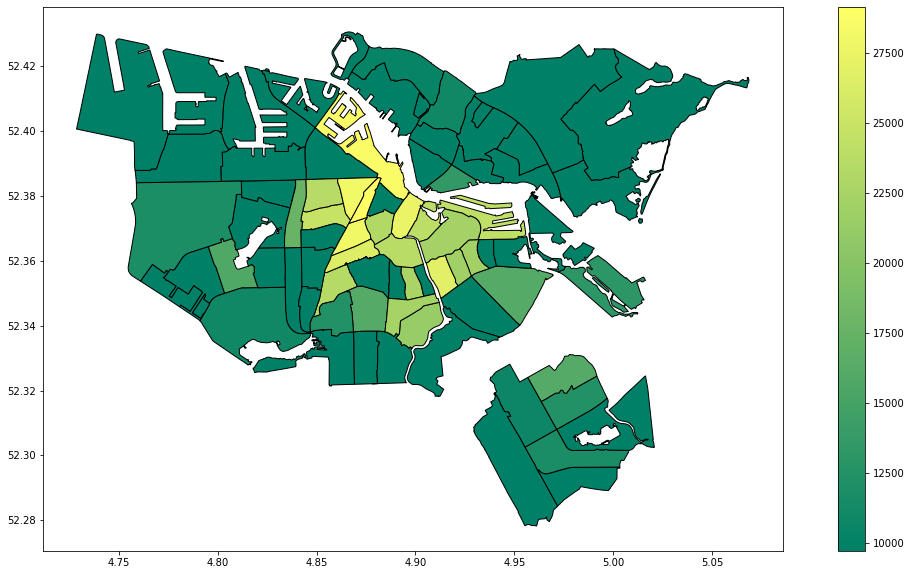

In [63]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 1, figsize=(20, 10))
base = gdf.plot(column = 'Population density float_x',  cmap='summer',ax=ax, legend=True, edgecolor='black')
base

## Low income population density distribution

In [64]:
gdf = pd.merge(gdf,pop_den[['postcode','40% persons with the lowest income']], on='postcode', how='left')
gdf.head()

,Id,postcode,Opp_m2,geometry,LNG,LAT,Population density float_x,40% persons with the lowest income
0,1,1082,1469377,"POLYGON ((4.86869 52.33810, 4.87200 52.33827, ...",4.875190,52.330143,9733.0,15.7
1,2,1102,3139699,"POLYGON ((4.95676 52.32404, 4.96357 52.31659, ...",4.954522,52.315311,10645.0,46.1
2,2,1102,3139699,"POLYGON ((4.95676 52.32404, 4.96357 52.31659, ...",4.954522,52.315311,10645.0,50.0
3,3,1101,5292105,"POLYGON ((4.94021 52.31933, 4.94035 52.31916, ...",4.950587,52.298748,9733.0,NaN
4,4,1107,2029641,"POLYGON ((4.96175 52.29537, 4.96232 52.29557, ...",4.982498,52.290373,9733.0,NaN


In [65]:
gdf['40% persons with the lowest income'].describe()

count    121.000000
mean      39.140496
std        8.718033
min       15.700000
25%       32.300000
50%       37.400000
75%       46.100000
max       62.200000
Name: 40% persons with the lowest income, dtype: float64

In [66]:
gdf['40% persons with the lowest income'].fillna(15.7, inplace = True)

<AxesSubplot:title={'center':'Income Based Household Distribution - Amsterdam'}>

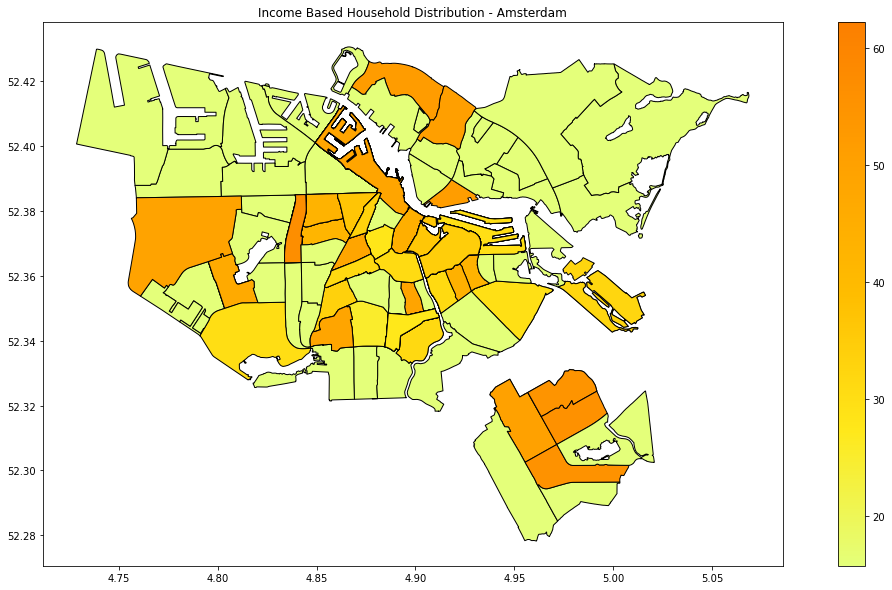

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.set_title("Income Based Household Distribution - Amsterdam")
income = gdf.plot(column = '40% persons with the lowest income',  cmap='Wistia',ax=ax, legend=True, edgecolor='black')
income

In [68]:
gdf = pd.merge(gdf,pop_den[['postcode','low income housholds']], on='postcode', how='left')
gdf.head()

,Id,postcode,Opp_m2,geometry,LNG,LAT,Population density float_x,40% persons with the lowest income,low income housholds
0,1,1082,1469377,"POLYGON ((4.86869 52.33810, 4.87200 52.33827, ...",4.875190,52.330143,9733.0,15.7,3.3
1,2,1102,3139699,"POLYGON ((4.95676 52.32404, 4.96357 52.31659, ...",4.954522,52.315311,10645.0,46.1,19.4
2,2,1102,3139699,"POLYGON ((4.95676 52.32404, 4.96357 52.31659, ...",4.954522,52.315311,10645.0,46.1,21.8
3,2,1102,3139699,"POLYGON ((4.95676 52.32404, 4.96357 52.31659, ...",4.954522,52.315311,10645.0,50.0,19.4
4,2,1102,3139699,"POLYGON ((4.95676 52.32404, 4.96357 52.31659, ...",4.954522,52.315311,10645.0,50.0,21.8


In [69]:
gdf['low income housholds'].describe()

count    681.000000
mean      14.492658
std        4.837234
min        2.100000
25%       10.900000
50%       14.100000
75%       17.700000
max       28.700000
Name: low income housholds, dtype: float64

In [70]:
gdf['low income housholds'].fillna(2.1, inplace = True)

<AxesSubplot:>

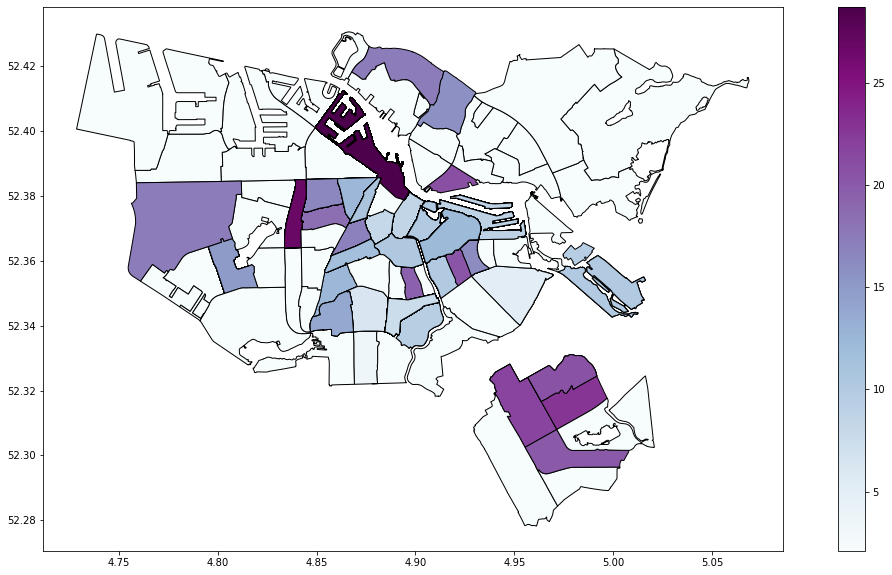

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

gdf.plot(column = 'low income housholds',  cmap='BuPu',ax=ax, legend=True, edgecolor='black')

<AxesSubplot:>

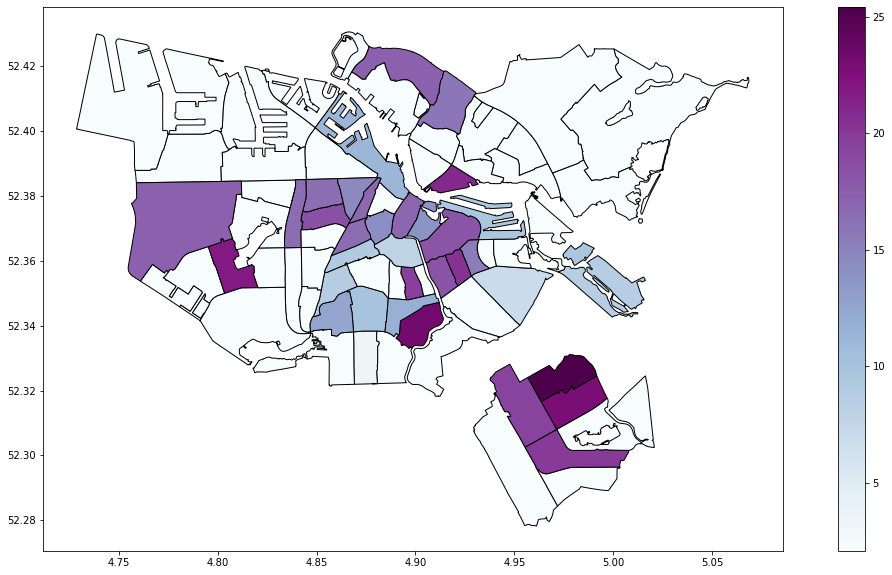

In [103]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
income2 = gdf.plot(column = 'low income housholds',  cmap='BuPu',ax=ax, legend=True, edgecolor='black')
income2

## Plotting restaurants

In [73]:
restaurants = pd.read_csv("FUNCTIEKAART.csv")
restaurants.head()

,OBJECTNUMMER,Functie,Functie_gecorrigeerd,VOT_ID,Adres,Aantal_adressen,Gebruiksdoel,WOZ_gebruik,Hoofdfunctie,Hoofdfunctie_ID,Gebruiksoppervlakte,Footprint,Oppervlakte_gecorrigeerd,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT
0,1,kerk,0,3.630100e+14,Aakstraat 60,0,bijeenkomstfunctie,kerk,Religie,R,0,0,0,POINT(4.912705 52.407577),POINT(52.407577 4.912705),4.912705,52.407577
1,2,kantoor,0,3.630100e+14,Aalbersestraat 244,0,kantoorfunctie,kantoor,Kantoren,K,239,0,0,POINT(4.798438 52.379375),POINT(52.379375 4.798438),4.798438,52.379375
2,3,wijk- / buurtcentrum,0,3.630100e+14,Aalbersestraat 248A,0,bijeenkomstfunctie,wijk- / buurtcentrum,Wijk / buurtcentrum,G,347,0,0,POINT(4.798151 52.379948),POINT(52.379948 4.798151),4.798151,52.379948
3,4,cafetaria / snackbar,0,3.630100e+14,Aalbersestraat 258,0,bijeenkomstfunctie,cafetaria / snackbar,Horeca,H,76,0,0,POINT(4.798213 52.38082),POINT(52.38082 4.798213),4.798213,52.380820
4,5,cafetaria / snackbar,0,3.630100e+14,Aalbersestraat 260,0,bijeenkomstfunctie,cafetaria / snackbar,Horeca,H,0,0,0,POINT(4.798212 52.380865),POINT(52.380865 4.798212),4.798212,52.380865


In [74]:
restaurants['Functie'].unique()

array(['kerk', 'kantoor', 'wijk- / buurtcentrum', 'cafetaria / snackbar',
       'winkel', 'café / bar / restaurant', 'atelier / werkruimte',
       'kinderdagverblijf', 'bijeenkomstfunctie', 'opslag / distributie',
       'overige gebruiksfunctie', 'industriefunctie', 'cultuur',
       'showroom / werkplaats / garage', 'kantoorfunctie',
       'productie (fabriek)', 'sport / recreatie', 'clubhuis',
       'basisschool', 'kantoor (hoofdcode)', 'praktijkruimte',
       'woning + kantoor', 'hotel / motel', 'onderwijs',
       'woning + winkel', 'energie en water', 'kiosk', 'winkelfunctie',
       'kantoor in bedrijfsverzamelgebouw',
       'woonfunctie|bijeenkomstfunctie', 'hogeschool / universiteit',
       'onderwijsfunctie', 'gemaal', 'horeca', '(detail)handel / winkel',
       'bijeenkomstfunctie|kantoorfunctie',
       'algemeen voortgezet onderwijs', 'gezondheidszorgfunctie',
       'beroepsonderwijs', 'bar / dancing', 'recreatie / sportcentrum',
       'schouwburg / concertgebouw'

In [75]:
eateries = ['kiosk', 'cafetaria / snackbar', 'café / bar / restaurant']

In [76]:
restaurants = restaurants[restaurants['Functie'].isin(eateries)]
restaurants

,OBJECTNUMMER,Functie,Functie_gecorrigeerd,VOT_ID,Adres,Aantal_adressen,Gebruiksdoel,WOZ_gebruik,Hoofdfunctie,Hoofdfunctie_ID,Gebruiksoppervlakte,Footprint,Oppervlakte_gecorrigeerd,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT
3,4,cafetaria / snackbar,0,3.630100e+14,Aalbersestraat 258,0,bijeenkomstfunctie,cafetaria / snackbar,Horeca,H,76,0,0,POINT(4.798213 52.38082),POINT(52.38082 4.798213),4.798213,52.380820
4,5,cafetaria / snackbar,0,3.630100e+14,Aalbersestraat 260,0,bijeenkomstfunctie,cafetaria / snackbar,Horeca,H,0,0,0,POINT(4.798212 52.380865),POINT(52.380865 4.798212),4.798212,52.380865
8,9,café / bar / restaurant,0,3.630100e+14,Aalbersestraat 290,0,bijeenkomstfunctie,café / bar / restaurant,Horeca,H,146,0,0,POINT(4.798166 52.38215),POINT(52.38215 4.798166),4.798166,52.382150
10,11,café / bar / restaurant,0,3.630100e+14,Aalsmeerweg 1,0,bijeenkomstfunctie,café / bar / restaurant,Horeca,H,115,0,0,POINT(4.849686 52.350858),POINT(52.350858 4.849686),4.849686,52.350858
15,16,cafetaria / snackbar,0,3.630100e+14,Aalsmeerweg 14/H,0,bijeenkomstfunctie,cafetaria / snackbar,Horeca,H,75,0,0,POINT(4.849249 52.350577),POINT(52.350577 4.849249),4.849249,52.350577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32919,32920,café / bar / restaurant,0,3.630100e+14,Zuidplein 13,0,winkelfunctie,café / bar / restaurant,Horeca,H,156,0,0,POINT(4.873124 52.339574),POINT(52.339574 4.873124),4.873124,52.339574
32983,32984,café / bar / restaurant,0,3.630100e+14,Zwanenburgwal 15,0,bijeenkomstfunctie,café / bar / restaurant,Horeca,H,511,0,0,POINT(4.899606 52.367916),POINT(52.367916 4.899606),4.899606,52.367916
32986,32987,café / bar / restaurant,0,3.630100e+14,Zwanenburgwal 232,0,bijeenkomstfunctie,café / bar / restaurant,Horeca,H,162,0,0,POINT(4.898488 52.368118),POINT(52.368118 4.898488),4.898488,52.368118
32993,32994,café / bar / restaurant,0,3.630100e+14,Zwarte Pad 30,0,bijeenkomstfunctie,café / bar / restaurant,Horeca,H,104,0,0,POINT(4.781225 52.346007),POINT(52.346007 4.781225),4.781225,52.346007


In [77]:
restaurants['WKT_LNG_LAT'] = restaurants['WKT_LNG_LAT'].apply(wkt.loads)
rest_gdf = gpd.GeoDataFrame(restaurants, crs='epsg:4326')
rest_gdf.head()

,OBJECTNUMMER,Functie,Functie_gecorrigeerd,VOT_ID,Adres,Aantal_adressen,Gebruiksdoel,WOZ_gebruik,Hoofdfunctie,Hoofdfunctie_ID,Gebruiksoppervlakte,Footprint,Oppervlakte_gecorrigeerd,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT
3,4,cafetaria / snackbar,0,3.630100e+14,Aalbersestraat 258,0,bijeenkomstfunctie,cafetaria / snackbar,Horeca,H,76,0,0,POINT (4.798213 52.38082),POINT(52.38082 4.798213),4.798213,52.380820
4,5,cafetaria / snackbar,0,3.630100e+14,Aalbersestraat 260,0,bijeenkomstfunctie,cafetaria / snackbar,Horeca,H,0,0,0,POINT (4.798212 52.380865),POINT(52.380865 4.798212),4.798212,52.380865
8,9,café / bar / restaurant,0,3.630100e+14,Aalbersestraat 290,0,bijeenkomstfunctie,café / bar / restaurant,Horeca,H,146,0,0,POINT (4.798166 52.38215),POINT(52.38215 4.798166),4.798166,52.382150
10,11,café / bar / restaurant,0,3.630100e+14,Aalsmeerweg 1,0,bijeenkomstfunctie,café / bar / restaurant,Horeca,H,115,0,0,POINT (4.849686 52.350858),POINT(52.350858 4.849686),4.849686,52.350858
15,16,cafetaria / snackbar,0,3.630100e+14,Aalsmeerweg 14/H,0,bijeenkomstfunctie,cafetaria / snackbar,Horeca,H,75,0,0,POINT (4.849249 52.350577),POINT(52.350577 4.849249),4.849249,52.350577


In [78]:
rest_gdf.rename({'OBJECTNUMMER':'Id','WKT_LNG_LAT':'geometry'}, axis = 1, inplace = True)
#rest_gdf = rest_gdf.to_crs(gdf.crs)

<AxesSubplot:>

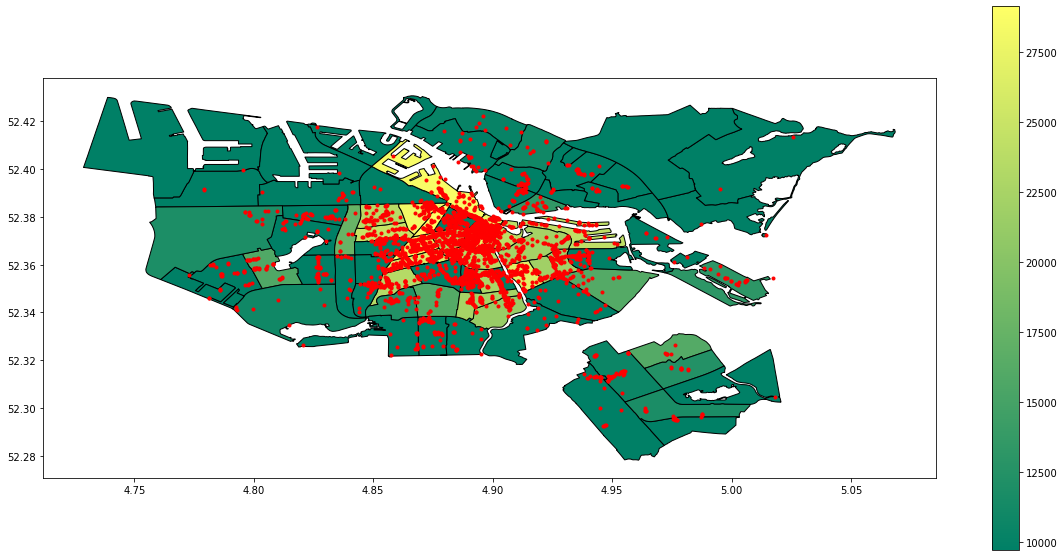

In [112]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))
base = gdf.plot(column = 'Population density float_x', cmap='summer', ax = ax, legend=True, edgecolor='black')
level1 = rest_gdf.plot(marker='o', color='red', markersize=9, ax=ax)
level1

In [80]:
plt.savefig("density.png")

<Figure size 432x288 with 0 Axes>

## Amsterdam central

In [81]:
## central -> (52.3994478,4.8382489)

In [82]:
hub = pd.DataFrame(columns=['geometry'])
hub

,geometry


In [83]:
hub['geometry']= ['POINT(4.8682489 52.3934478)']
hub

,geometry
0,POINT(4.8682489 52.3934478)


In [84]:
hub['geometry'] = hub['geometry'].apply(wkt.loads)
hub = gpd.GeoDataFrame(hub, crs='epsg:4326')
hub 

,geometry
0,POINT (4.86825 52.39345)


<AxesSubplot:>

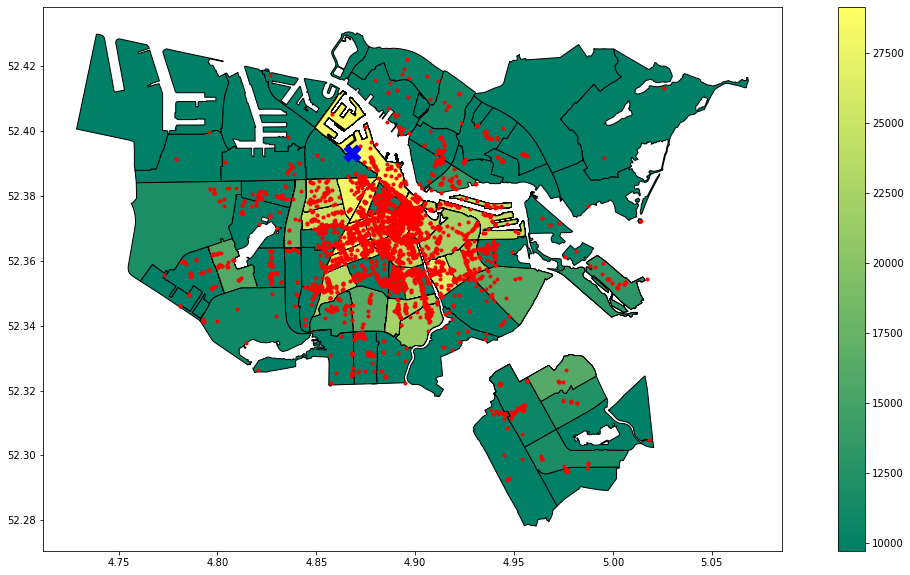

In [85]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))
base = gdf.plot(column = 'Population density float_x', cmap='summer', ax = ax, legend=True, edgecolor='black')
level1 = rest_gdf.plot(marker='o', color='red', markersize=9, ax=base)
level2 = hub.plot(marker='X', color='blue', markersize=280, ax=level1)
level2

## Zipcodes distance from Amsterdam central

In [86]:
import geopy.distance

hub = (52.3934478, 4.8682489)
def distance(area):
    return geopy.distance.geodesic(hub, area).km


In [87]:
gdf.reset_index(drop = True, inplace = True)
gdf

,Id,postcode,Opp_m2,geometry,LNG,LAT,Population density float_x,40% persons with the lowest income,low income housholds
0,1,1082,1469377,"POLYGON ((4.86869 52.33810, 4.87200 52.33827, ...",4.875190,52.330143,9733.0,15.7,3.3
1,2,1102,3139699,"POLYGON ((4.95676 52.32404, 4.96357 52.31659, ...",4.954522,52.315311,10645.0,46.1,19.4
2,2,1102,3139699,"POLYGON ((4.95676 52.32404, 4.96357 52.31659, ...",4.954522,52.315311,10645.0,46.1,21.8
3,2,1102,3139699,"POLYGON ((4.95676 52.32404, 4.96357 52.31659, ...",4.954522,52.315311,10645.0,50.0,19.4
4,2,1102,3139699,"POLYGON ((4.95676 52.32404, 4.96357 52.31659, ...",4.954522,52.315311,10645.0,50.0,21.8
...,...,...,...,...,...,...,...,...,...
719,79,1052,530690,"POLYGON ((4.86636 52.37158, 4.86724 52.37253, ...",4.874475,52.378639,29133.0,33.4,10.9
720,80,1076,1460835,"POLYGON ((4.84818 52.34276, 4.84979 52.34292, ...",4.857737,52.343752,12319.0,36.4,12.5
721,80,1076,1460835,"POLYGON ((4.84818 52.34276, 4.84979 52.34292, ...",4.857737,52.343752,12319.0,36.4,13.8
722,80,1076,1460835,"POLYGON ((4.84818 52.34276, 4.84979 52.34292, ...",4.857737,52.343752,12319.0,48.5,12.5


In [88]:
dist_hub = []
hub = (52.3934478, 4.8682489)
for x in range(len(gdf)):
    lt = gdf['LAT'][x]
    ng = gdf['LNG'][x]
    area = (lt,ng)
    dist_hub.append(geopy.distance.geodesic(hub, area).km)
gdf['displacement_hub'] = dist_hub    
gdf   
    

,Id,postcode,Opp_m2,geometry,LNG,LAT,Population density float_x,40% persons with the lowest income,low income housholds,displacement_hub
0,1,1082,1469377,"POLYGON ((4.86869 52.33810, 4.87200 52.33827, ...",4.875190,52.330143,9733.0,15.7,3.3,7.060050
1,2,1102,3139699,"POLYGON ((4.95676 52.32404, 4.96357 52.31659, ...",4.954522,52.315311,10645.0,46.1,19.4,10.495142
2,2,1102,3139699,"POLYGON ((4.95676 52.32404, 4.96357 52.31659, ...",4.954522,52.315311,10645.0,46.1,21.8,10.495142
3,2,1102,3139699,"POLYGON ((4.95676 52.32404, 4.96357 52.31659, ...",4.954522,52.315311,10645.0,50.0,19.4,10.495142
4,2,1102,3139699,"POLYGON ((4.95676 52.32404, 4.96357 52.31659, ...",4.954522,52.315311,10645.0,50.0,21.8,10.495142
...,...,...,...,...,...,...,...,...,...,...
719,79,1052,530690,"POLYGON ((4.86636 52.37158, 4.86724 52.37253, ...",4.874475,52.378639,29133.0,33.4,10.9,1.701475
720,80,1076,1460835,"POLYGON ((4.84818 52.34276, 4.84979 52.34292, ...",4.857737,52.343752,12319.0,36.4,12.5,5.576037
721,80,1076,1460835,"POLYGON ((4.84818 52.34276, 4.84979 52.34292, ...",4.857737,52.343752,12319.0,36.4,13.8,5.576037
722,80,1076,1460835,"POLYGON ((4.84818 52.34276, 4.84979 52.34292, ...",4.857737,52.343752,12319.0,48.5,12.5,5.576037


In [89]:
gdf.drop_duplicates(subset='postcode',keep='first', inplace =True)
gdf['displacement_hub'].describe()

count    80.000000
mean      5.542331
std       3.013309
min       0.388137
25%       3.188270
50%       5.078531
75%       6.928065
max      13.862894
Name: displacement_hub, dtype: float64

In [90]:
gdf['displacement_hub'].quantile(0.35)

4.104406512502311

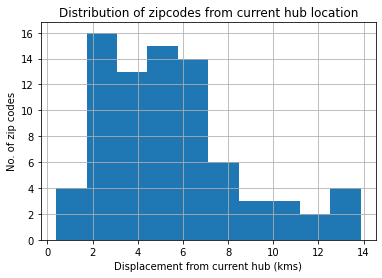

In [91]:
displacement_hist = gdf.hist(column = 'displacement_hub',bins=10)
for ax in displacement_hist.flatten():
    ax.set_xlabel("Displacement from current hub (kms)")
    ax.set_ylabel("No. of zip codes")
    ax.set_title("Distribution of zipcodes from current hub location")

## Clustering zipcodes that are far awar from Amsterdam Central

In [98]:
zips_to_cluster = gdf[gdf['displacement_hub'] >5]

In [99]:
gdf.to_csv("geopandas_amsterdam.csv")
df = pd.read_csv("geopandas_amsterdam.csv")

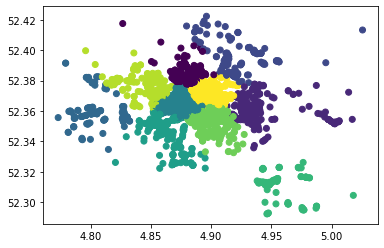

In [100]:
#from sklearn.cluster import DBSCAN  #Clustering restaurants
from scipy.cluster.vq import kmeans2, whiten
coords = restaurants[['LNG','LAT']].to_numpy()
x, y = kmeans2(whiten(coords), 10, iter = 20)  
plt.scatter(coords[:,0], coords[:,1], c=y);
plt.show()

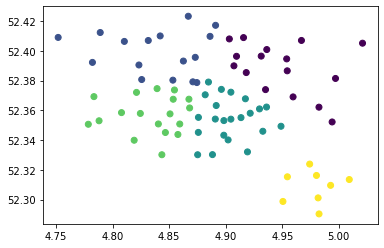

In [101]:
coords = df[['LNG','LAT']].to_numpy() # Clustering areas
x, y = kmeans2(whiten(coords), 5, iter = 20)  
plt.scatter(coords[:,0], coords[:,1], c=y);
plt.show()

<AxesSubplot:>

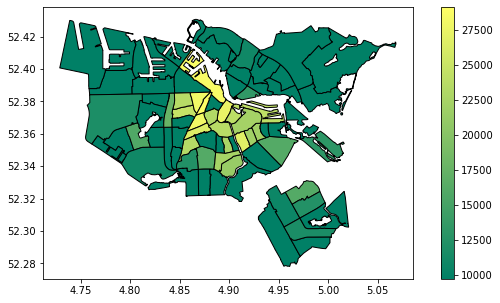

In [102]:
fig, ax = plt.subplots(1,1,figsize = (10,5))
base = gdf.plot(column = 'Population density float_x',  cmap='summer',ax=ax, legend=True ,edgecolor='black')
base